## Load geo data

This post shows how to build a choropleth map for US counties. County border coordinates have been found here and stored on github [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson). Let's load this data stored at `geojson` format with `geopandas`, and draw a map with it thanks to `geoplot`.

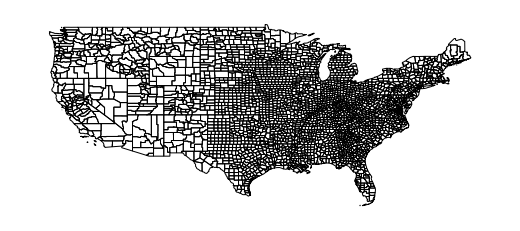

In [86]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));


__Note__: if you need more explanation on this step, there is this [dedicated post](https://www.python-graph-gallery.com/map-read-geojson-with-python-geopandas). More generally, have a look to the [background map](https://www.python-graph-gallery.com/map) section of the python graph gallery.

## Load numeric data

A choropleth map shows the distribution of a numeric variable on each items of a map. Let's consider the unemployment rate of each US county. Data comes from the Bureau of Labor Statistics, found [here](https://observablehq.com/@d3/choropleth) and stored [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv).

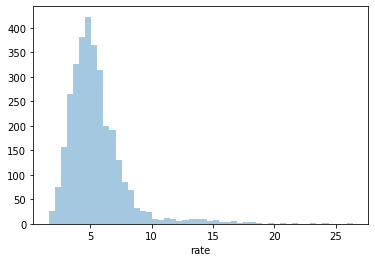

In [87]:
# library
import pandas as pd
import seaborn as sns

# Read file
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv')

# Show the distribution of unemployment rate
sns.distplot( data["rate"], hist=True, kde=False, rug=False );


## Merge spatial & numeric data


Both source of information need to be merged in order to be represented on the same figure. This can be done thanks to the `merge()` function.

In [88]:
fullData = geoData.merge(data, left_on=['id'], right_on=['id'])
fullData.head(2)

id          GEO_ID STATE COUNTY     NAME    LSAD  CENSUSAREA  \
0  1001  0500000US01001    01    001  Autauga  County     594.436   
1  1009  0500000US01009    01    009   Blount  County     644.776   

                                            geometry    state          county  \
0  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  Alabama  Autauga County   
1  POLYGON ((-86.57780 33.76532, -86.75914 33.840...  Alabama   Blount County   

   rate  
0   5.1  
1   5.1

## Choropleth map with `GeoPlot`

The hardest part of the job has been done. Now, the `choropleth()` function of the `geoplot` library allows to build the choropleth pretty easily. The `hue` parameter expects the name of the column we want to use to control the color of each county.

The hardest part is probably to pick the right type of color palette. `Geoplot` comes with both continuous and categorical binning schemes, i.e. methods that split a sequence of observations into some number of bins. Please read [this page](Quantiles) to know more about those options.

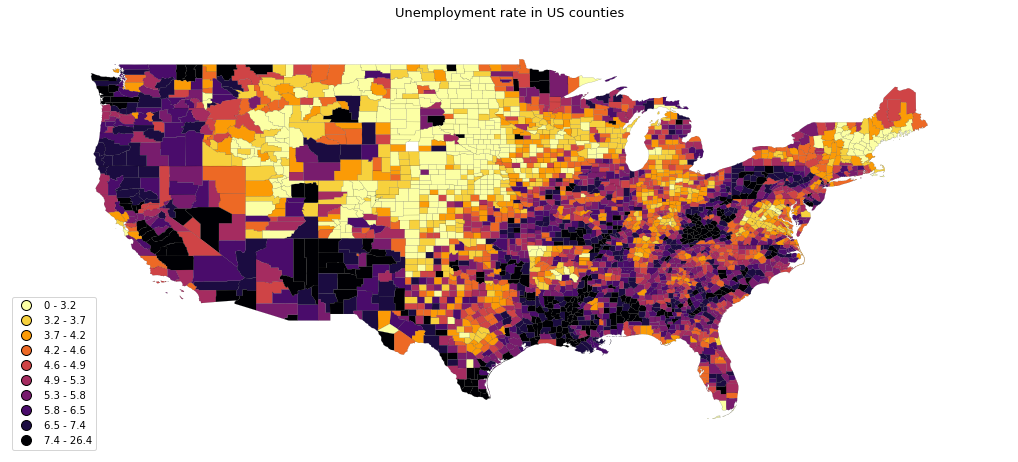

In [91]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['rate'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="rate", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Unemployment rate in US counties', fontsize=13);